<a href="https://colab.research.google.com/github/rainaa0277/Predicting-Stock-Close-Price-using-ANN/blob/main/Stock_close_price_prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install tensorflow==2.0.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
import os
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
from google.colab import drive

In [11]:
!dir

sample_data


In [13]:
os.chdir("/content/drive")

In [ ]:
!dir

In [40]:
os.chdir("/content/drive/MyDrive/Deep Learning/Practice ANN/ANN 6 - Stock price prediction")

In [41]:
!dir

data.csv  Stock\ price\ prediction\ using\ ANN.ipynb


In [42]:
df = pd.read_csv("data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-27,9982.179688,10159.879883,9936.620117,10150.650391,10150.650391,207760000
1,2010-08-30,10145.580078,10150.570313,10007.679688,10009.730469,10009.730469,150480000
2,2010-08-31,10006.419922,10073.379883,9941.839844,10014.719727,10014.719727,255420000
3,2010-09-01,10016.009766,10279.080078,10016.009766,10269.469727,10269.469727,205710000
4,2010-09-02,10270.080078,10320.370117,10253.959961,10320.099609,10320.099609,149930000


In [43]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [44]:
df.shape

(2014, 7)

In [45]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,16756.880170,16835.962791,16676.660195,16762.755255,16762.755255,1.699523e+08
std,3985.884743,3992.888506,3977.350484,3984.242430,3984.242430,1.072222e+08
min,9982.179688,10073.379883,9936.620117,10009.730469,10009.730469,8.410000e+06
25%,13104.239746,13175.674805,13045.425049,13107.277588,13107.277588,9.486500e+07
50%,16566.544922,16652.890625,16500.360352,16571.265625,16571.265625,1.284750e+08
75%,18282.699219,18350.062988,18205.062500,18287.908203,18287.908203,2.177400e+08
max,26584.279297,26616.710938,26435.339844,26616.710938,26616.710938,8.239400e+08


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2014 non-null   object 
 1   Open       2014 non-null   float64
 2   High       2014 non-null   float64
 3   Low        2014 non-null   float64
 4   Close      2014 non-null   float64
 5   Adj Close  2014 non-null   float64
 6   Volume     2014 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.3+ KB


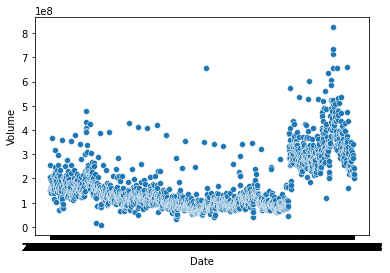

In [47]:
sns.scatterplot(x = df.Date, y=df.Volume)

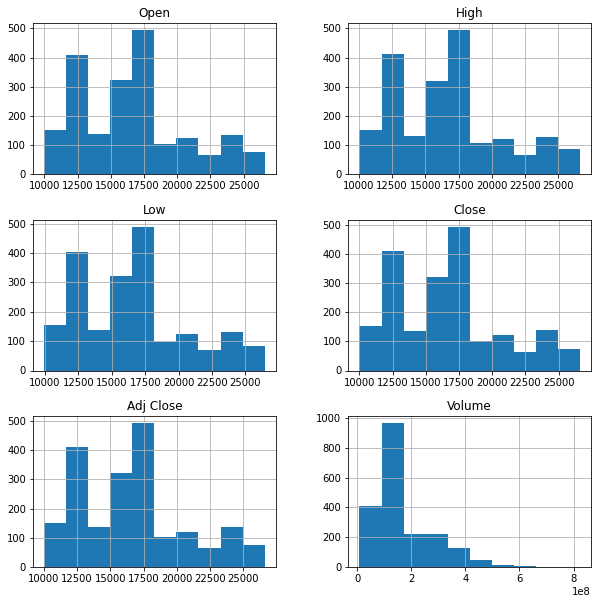

In [48]:
df.hist(figsize=(10,10))
plt.show()

In [49]:
scale = StandardScaler()

In [57]:
data = df.iloc[:,[1,2,3,5,6]]
target = df.iloc[:,4] 

In [58]:
data.head()

,Open,High,Low,Adj Close,Volume
0,9982.179688,10159.879883,9936.620117,10150.650391,207760000
1,10145.580078,10150.570313,10007.679688,10009.730469,150480000
2,10006.419922,10073.379883,9941.839844,10014.719727,255420000
3,10016.009766,10279.080078,10016.009766,10269.469727,205710000
4,10270.080078,10320.370117,10253.959961,10320.099609,149930000


In [59]:
target.tail()

2009    25822.289063
2010    25733.599609
2011    25656.980469
2012    25790.349609
2013    26049.640625
Name: Close, dtype: float64

In [61]:
scaled_df = scale.fit_transform(data)
scaled_df

array([[-1.70009507, -1.67240857, -1.69502638, -1.65997605,  0.35269814],
       [-1.65909013, -1.67474068, -1.67715589, -1.69535415, -0.1816524 ],
       [-1.69401204, -1.69407746, -1.69371369, -1.69410159,  0.79730615],
       ...,
       [ 2.24798371,  2.23617932,  2.24611271,  2.23290482,  0.40409953],
       [ 2.24138898,  2.2520841 ,  2.26637257,  2.26638729,  0.28338556],
       [ 2.29010566,  2.31258655,  2.31519378,  2.33148258,  0.47163964]])

In [63]:
scaled_df = pd.DataFrame(scaled_df, columns=data.columns)
scaled_df

,Open,High,Low,Adj Close,Volume
0,-1.700095,-1.672409,-1.695026,-1.659976,0.352698
1,-1.659090,-1.674741,-1.677156,-1.695354,-0.181652
2,-1.694012,-1.694077,-1.693714,-1.694102,0.797306
3,-1.691605,-1.642548,-1.675061,-1.630146,0.333574
4,-1.627847,-1.632205,-1.615220,-1.617436,-0.186783
...,...,...,...,...,...
2009,2.266085,2.267808,2.290596,2.274406,0.668569
2010,2.275638,2.254617,2.274885,2.252140,0.284785
2011,2.247984,2.236179,2.246113,2.232905,0.404100
2012,2.241389,2.252084,2.266373,2.266387,0.283386


In [64]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.20, random_state=50)
print(X_train.shape,"X_train")
print(X_test.shape,"X_test")
print(y_train.shape,"y_train")
print(y_test.shape,"y_test")

(1611, 5) X_train
(403, 5) X_test
(1611,) y_train
(403,) y_test


In [98]:
model = Sequential()

In [99]:
model.add(Dense(units = 512, input_shape=(5,), activation="relu", kernel_initializer="normal"))

model.add(Dense(units = 256, activation="relu", kernel_initializer="normal"))

model.add(Dense(units = 128, activation="relu", kernel_initializer="normal"))

model.add(Dense(units = 64, activation="relu", kernel_initializer="normal"))

model.add(Dense(units = 1, activation="linear", kernel_initializer="normal"))

In [100]:
model.compile(loss = "mean_squared_error", optimizer="adam", metrics=["mse"])

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               3072      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 175,617
Trainable params: 175,617
Non-trainable params: 0
_________________________________________________________________


In [102]:
train_data = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100,batch_size=35)

Train on 1611 samples, validate on 403 samples
Epoch 1/100
1611/1611 [==============================] - 0s 242us/sample - loss: 293974164.9460 - mse: 293974144.0000 - val_loss: 285240873.5285 - val_mse: 285240832.0000
Epoch 2/100
1611/1611 [==============================] - 0s 190us/sample - loss: 162816842.1527 - mse: 162816848.0000 - val_loss: 52485500.1985 - val_mse: 52485500.0000
Epoch 3/100
1611/1611 [==============================] - 0s 183us/sample - loss: 27327505.6428 - mse: 27327508.0000 - val_loss: 9510585.2519 - val_mse: 9510585.0000
Epoch 4/100
1611/1611 [==============================] - 0s 177us/sample - loss: 7858827.5707 - mse: 7858827.5000 - val_loss: 6270993.8908 - val_mse: 6270994.0000
Epoch 5/100
1611/1611 [==============================] - 0s 176us/sample - loss: 5689722.6668 - mse: 5689723.5000 - val_loss: 4411308.6954 - val_mse: 4411309.0000
Epoch 6/100
1611/1611 [==============================] - 0s 191us/sample - loss: 3987448.3119 - mse: 3987448.0000 - val_lo

In [109]:
y_pred = model.predict(X_test)

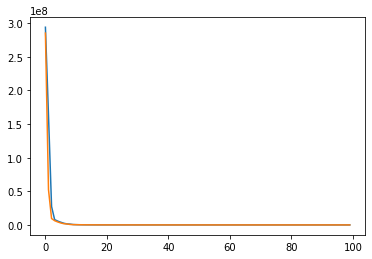

In [110]:
ax = np.arange(0,100)
yx = plt.plot(ax,train_data.history["loss"])
yx = plt.plot(ax,train_data.history["val_loss"])
plt.show()

In [112]:
r2_score(y_test,y_pred)

0.9999391423995125

In [115]:
y_test.shape, y_pred.shape

((403,), (403, 1))

In [124]:
y_pred[:,0]

array([17229.95  , 24720.373 , 13023.816 , 16947.018 , 17583.064 ,
       16296.874 , 15541.308 , 24736.248 , 12169.486 , 13425.666 ,
       11228.221 , 10768.296 , 17718.12  , 15525.737 , 13107.634 ,
       19109.129 , 22761.23  , 11589.609 , 14543.613 , 11815.378 ,
       12862.249 , 13213.034 , 17734.951 , 11220.445 , 17939.078 ,
       21814.303 , 12869.964 , 17699.898 , 16372.798 , 23481.752 ,
       16177.3125, 24237.408 , 25293.363 , 22990.992 , 12463.027 ,
       17593.326 , 24603.855 , 18076.553 , 12945.793 , 25334.15  ,
       17121.184 , 16546.176 , 12577.303 , 11836.405 , 21997.553 ,
       20929.58  , 16518.074 , 22020.805 , 24718.629 , 16034.827 ,
       12110.479 , 24380.78  , 16263.964 , 22253.512 , 11571.822 ,
       16577.389 , 18038.008 , 16575.715 , 13173.2705, 15330.738 ,
       12645.671 , 16861.875 , 17432.75  , 20912.836 , 12084.323 ,
       12836.752 , 20040.383 , 16359.95  , 11957.287 , 15295.301 ,
       19790.232 , 18185.047 , 17781.508 , 15732.34  , 16131.4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


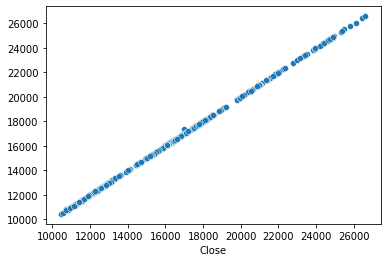

In [122]:
sns.scatterplot(y_test, y_pred[:,0])